<a href="https://colab.research.google.com/github/NathR-tiny/2025_Intro_Python/blob/main/Transporte%20solute%20in%20watershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Load the main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [19]:
# Exercice 1 transport in watershed

#from google.colab import files

# Charger le fichier CSV depuis ton PC
#uploaded = files.upload()


# Lire le CSV (remplace par le nom exact de ton fichier après l'upload)
df = pd.read_csv("PlynlimonResearchCatchmentHydrochemistryData.csv")
df["date_time"] = pd.to_datetime(df["date_time"])

df


nrow,ncol = df.shape  # get number of rows and columns
print(f'The sample dataset has {nrow} rows and {ncol} columns')


Saving PlynlimonResearchCatchmentHydrochemistryData.csv to PlynlimonResearchCatchmentHydrochemistryData (3).csv
The sample dataset has 15661 rows and 143 columns


In [ ]:
# Make a selection of variables and sites
var_selection = [
    "SITE NAME",  # for the location
    "date_time",  # for the time
    "Cl mg/l",  # element of interest
    "Na mg/l",  # element of interest
    "Si mg/l",  # element of interest
    "DOC mg/l",  # element of interest
    "log_flow",  # element of interest
    ]

# Create a boolean index to filter by location and time
q = (
    (df["SITE NAME"].isin(["Lower Hafren","Upper Hafren"])) &  # select 2 sites
    (df["date_time"] >= '1988-01-01') & (df["date_time"] < '2008-01-01')
)

# Produce the new dataframe (subset using the loc method)
df_ex1 = df.loc[q,var_selection]
df_ex1

,SITE NAME,date_time,Cl mg/l,Na mg/l,Si mg/l,DOC mg/l,log_flow
3397,Lower Hafren,1988-01-05 09:05:00,7.20,3.69,1.25,1.10,-0.420216
3398,Lower Hafren,1988-01-06 13:45:00,10.20,4.68,0.95,1.80,0.112605
3399,Lower Hafren,1988-01-12 09:30:00,6.70,3.75,1.55,0.80,-0.559091
3400,Lower Hafren,1988-01-19 09:26:00,6.60,3.81,1.35,1.10,-0.546682
3401,Lower Hafren,1988-01-26 09:20:00,6.40,3.57,1.35,1.00,-0.552842
...,...,...,...,...,...,...,...
10386,Upper Hafren,2007-11-20 11:05:00,6.03,3.82,1.95,2.20,-0.765134
10387,Upper Hafren,2007-11-27 11:15:00,6.54,3.76,1.89,2.12,-0.665546
10388,Upper Hafren,2007-12-04 15:10:00,6.42,3.71,1.29,NaN,-0.279637
10389,Upper Hafren,2007-12-11 11:49:00,6.09,3.53,1.49,NaN,-0.413118


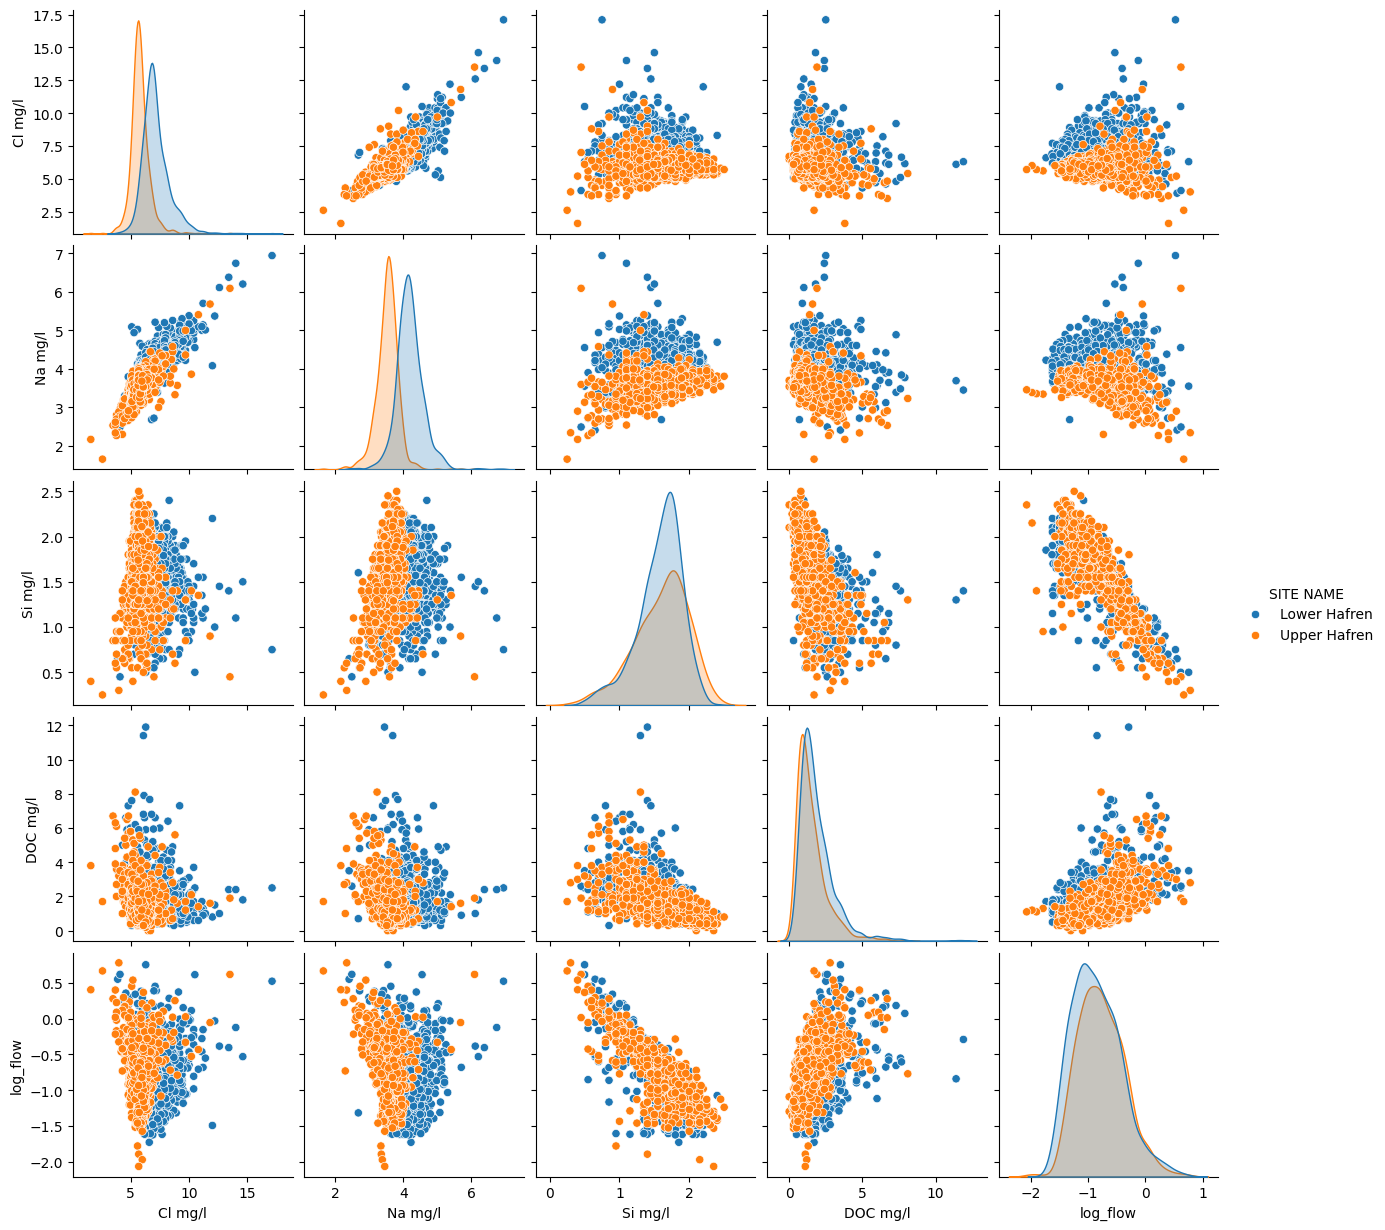

In [ ]:
# Use sns.pairplot and map the site into color
g = sns.pairplot(
    data = df_ex1,
    hue = "SITE NAME"
    )

In [ ]:
# EX2
# Make a selection of variables and sites
var_selection = [
    "SITE NAME",  # for the location
    "date_time",  # for the time
    "Cl mg/l",  # element of interest
    "Na mg/l",  # element of interest
    "Si mg/l",  # element of interest
    "DOC mg/l",  # element of interest
    "log_flow",  # element of interest
    ]

# Create a boolean index to filter by location and time
q = (
    (df["SITE NAME"].isin(["Lower Hafren","Upper Hafren"])) &  # select 2 sites
    (df["date_time"] >= '1988-01-01') & (df["date_time"] < '2008-01-01')
)

# Produce the new dataframe (subset using the loc method)
df_ex2 = df.loc[q,var_selection]

# Make the table longer
df_ex2 = pd.melt(
    df_ex2,
    id_vars = var_selection[:2],
    value_vars = var_selection[2:]
    )
df_ex2

,SITE NAME,date_time,variable,value
0,Lower Hafren,1988-01-05 09:05:00,Cl mg/l,7.200000
1,Lower Hafren,1988-01-06 13:45:00,Cl mg/l,10.200000
2,Lower Hafren,1988-01-12 09:30:00,Cl mg/l,6.700000
3,Lower Hafren,1988-01-19 09:26:00,Cl mg/l,6.600000
4,Lower Hafren,1988-01-26 09:20:00,Cl mg/l,6.400000
...,...,...,...,...
9495,Upper Hafren,2007-11-20 11:05:00,log_flow,-0.765134
9496,Upper Hafren,2007-11-27 11:15:00,log_flow,-0.665546
9497,Upper Hafren,2007-12-04 15:10:00,log_flow,-0.279637
9498,Upper Hafren,2007-12-11 11:49:00,log_flow,-0.413118


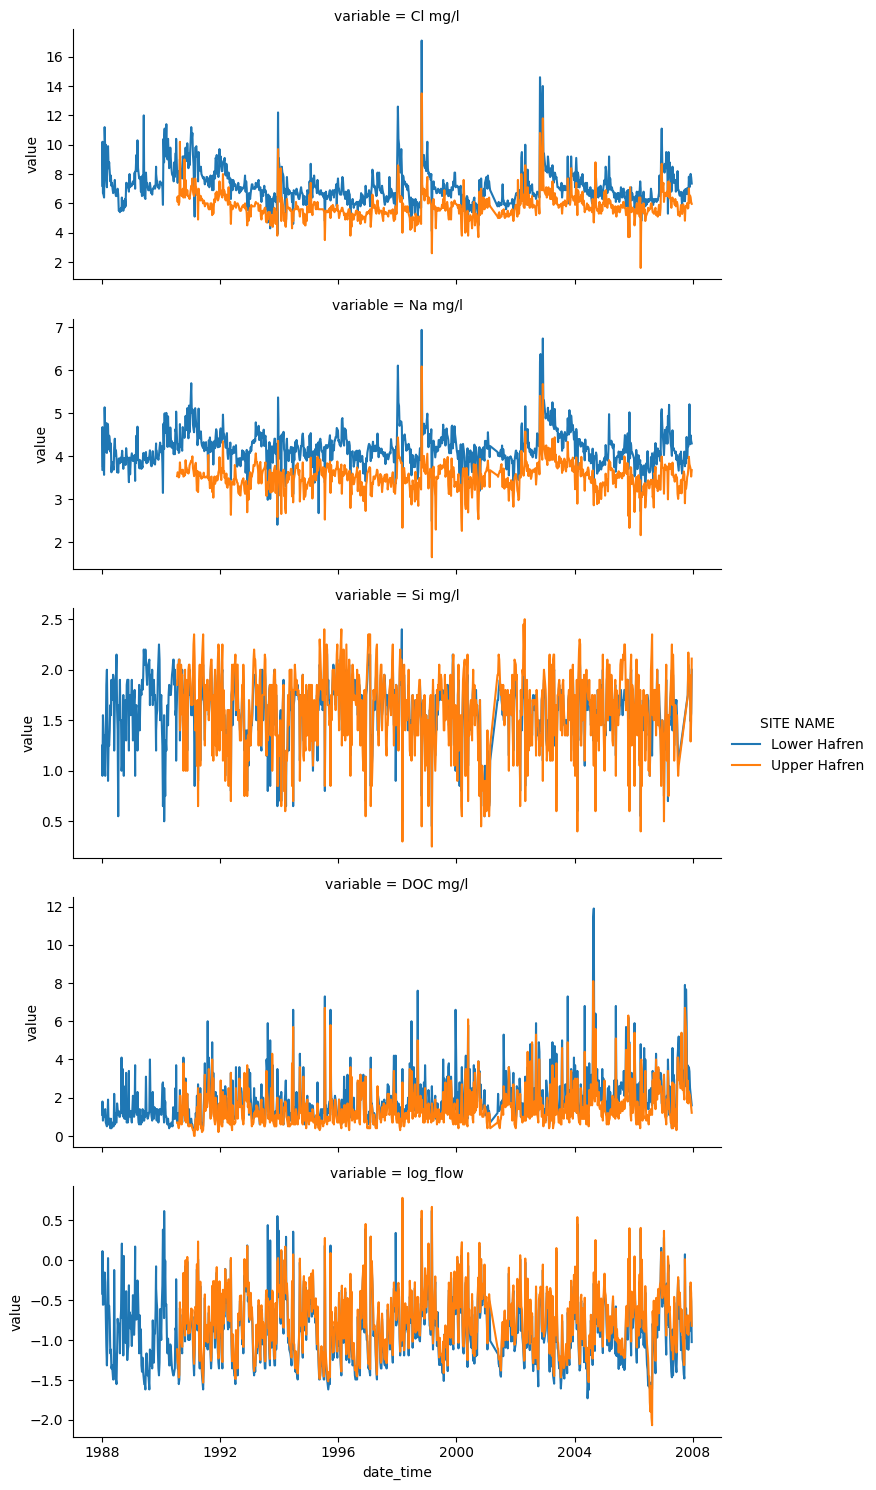

In [ ]:
# Line plots for each variables
g = sns.relplot(
    data = df_ex2,
    kind = 'line',
    hue = "SITE NAME",
    row = "variable",  # we plot the measurements over different rows of the figure grid
    x = "date_time",
    y = "value",
    facet_kws={'sharey': False, 'sharex': True},  # this is to avoid using the same y-axis in each plot
    height=3, aspect=2.5,  # to control the size of the subplots
    )
plt.show()


In [ ]:
#EX3
# Make a selection of variables and sites
var_selection = [
    "SITE NAME",  # for the location
    "date_time",  # for the time
    "Cl mg/l",  # element of interest
    "Na mg/l",  # element of interest
    "Si mg/l",  # element of interest
    "DOC mg/l",  # element of interest
    "log_flow",  # element of interest
    ]

# Create a boolean index to filter by location and time
q = (
    (df["SITE NAME"].isin(["Lower Hafren","Upper Hafren"])) &  # select 2 sites
    (df["date_time"] >= '1988-01-01') & (df["date_time"] < '2008-01-01')
)

# Produce the new dataframe (subset using the loc method)
df_ex3 = df.loc[q,var_selection]

# Make the table longer
df_ex3 = pd.melt(
    df_ex3,
    id_vars = var_selection[:2],
    value_vars = var_selection[2:]
    )

# Create an additional variable with the month of the date
df_ex3["month"] = df_ex3["date_time"].dt.month  # use the dt.month method

# Group by month and compute the long-term mean monthly concentration
df_ex3 = df_ex3.groupby(by=["SITE NAME","variable","month"]).mean().reset_index()
df_ex3

,SITE NAME,variable,month,date_time,value
0,Lower Hafren,Cl mg/l,1,1997-06-19 14:50:50.666666624,7.741111
1,Lower Hafren,Cl mg/l,2,1997-04-21 19:15:46.987951872,7.789024
2,Lower Hafren,Cl mg/l,3,1997-06-15 22:52:57.857142912,7.694048
3,Lower Hafren,Cl mg/l,4,1997-07-31 08:49:21.265822720,7.328205
4,Lower Hafren,Cl mg/l,5,1997-11-10 11:30:20.000000128,7.050000
...,...,...,...,...,...
115,Upper Hafren,log_flow,8,1999-04-09 16:30:47.848101248,-1.023780
116,Upper Hafren,log_flow,9,1999-02-14 23:37:44.415584384,-0.852114
117,Upper Hafren,log_flow,10,1999-03-27 19:30:49.629629696,-0.642916
118,Upper Hafren,log_flow,11,1999-04-21 21:55:14.025974016,-0.590044


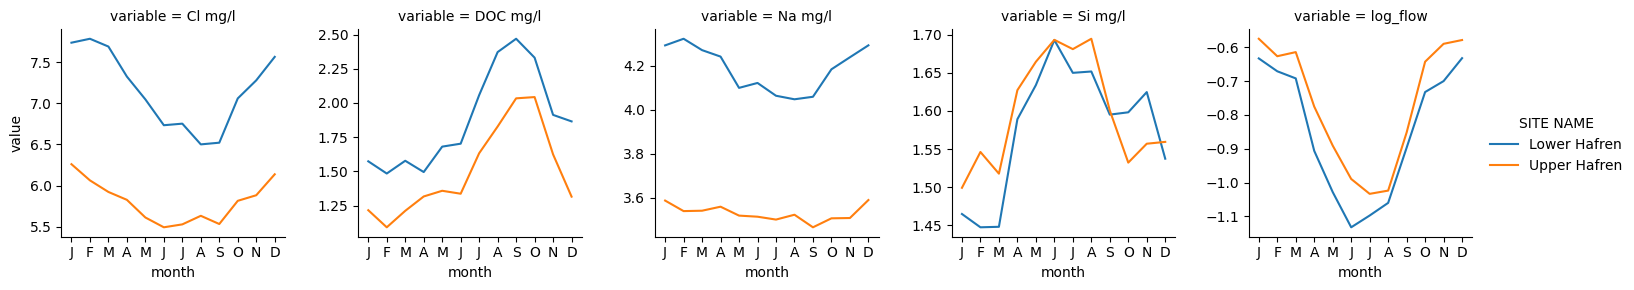

In [ ]:
# Display the seasonality of the mean value
g = sns.relplot(
    data = df_ex3,
    kind = 'line',
    hue = "SITE NAME",
    col = "variable",
    x = "month",
    y = "value",
    facet_kws={'sharey': False, 'sharex': True},  # this is to avoid using the same y-axis in each plot
    height=3, aspect=1,  # to control the size of the subplots
    )

# Add month abbreviations
months = ["J","F","M","A","M","J","J","A","S","O","N","D"]
months_3digit = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xticks(ticks=np.arange(1,13),labels=months)
plt.show()

EXERCISE 2


/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


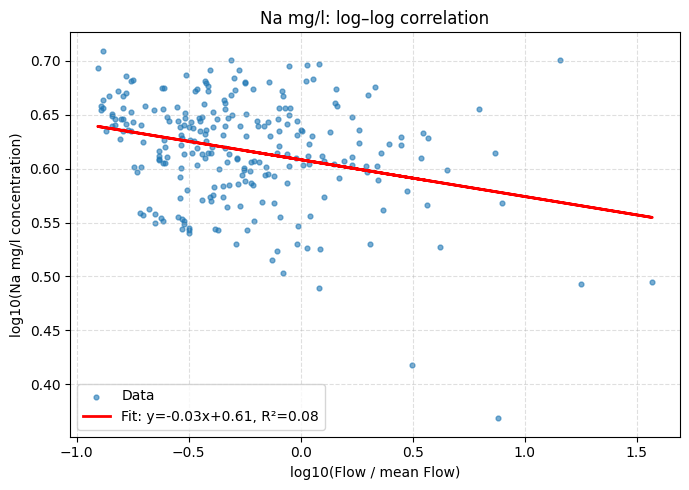

/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


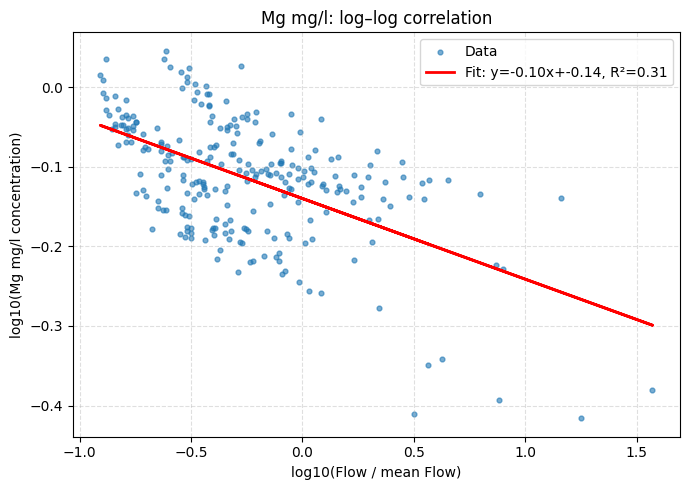

/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


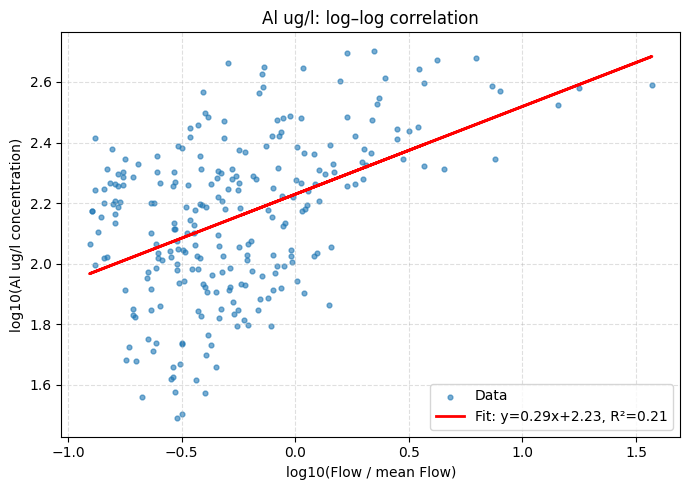

/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


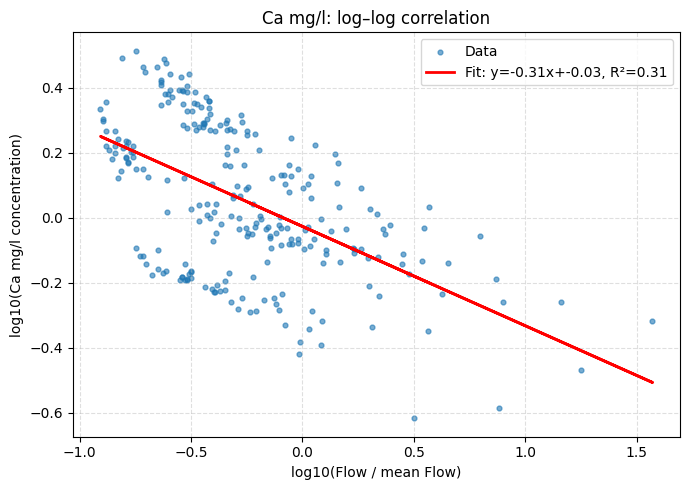

/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


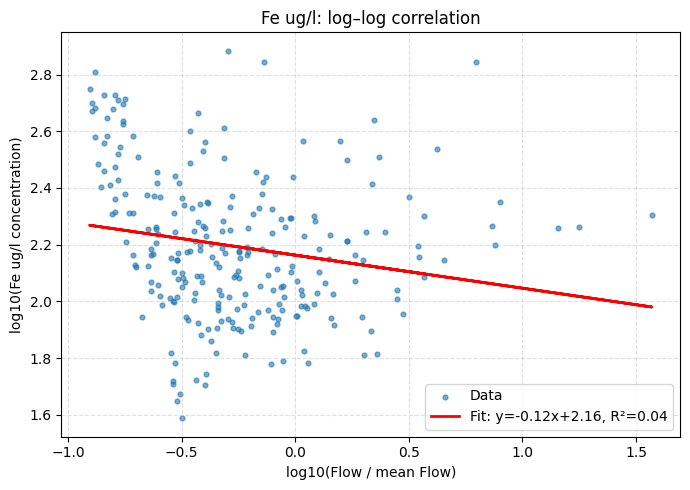

/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


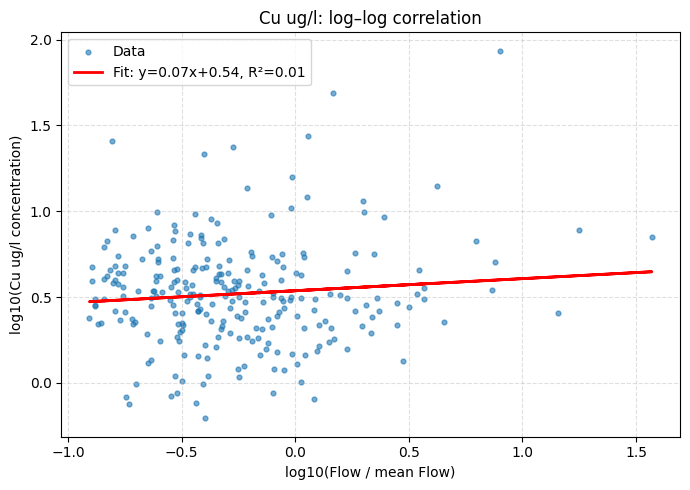

/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


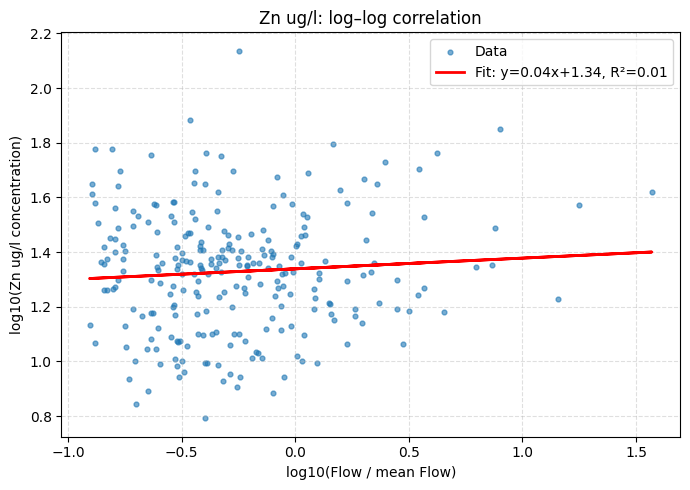

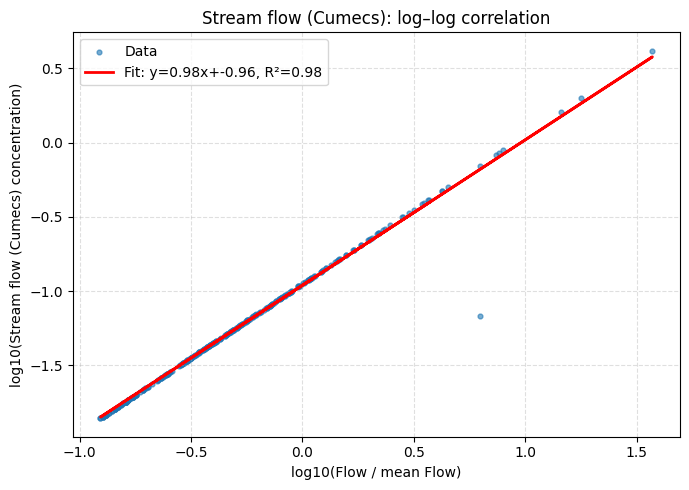

/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


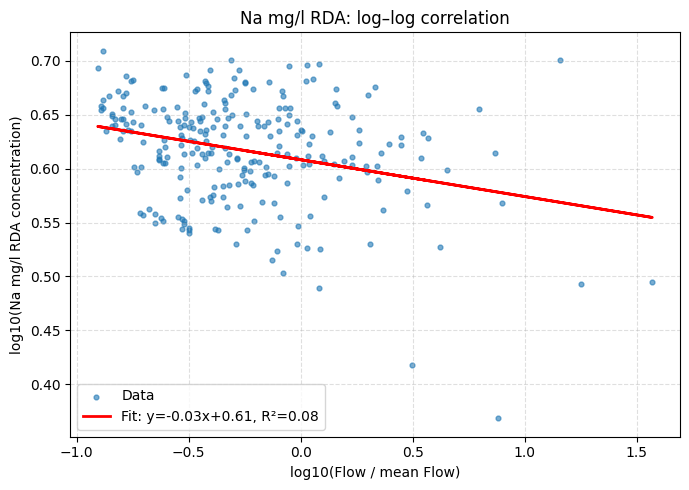

/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


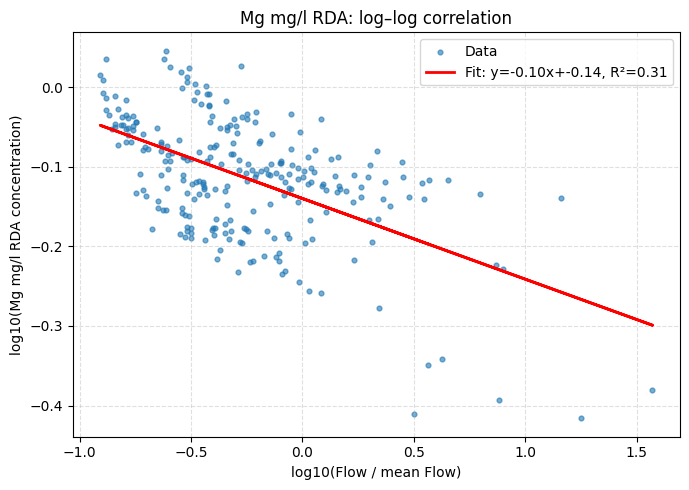

/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


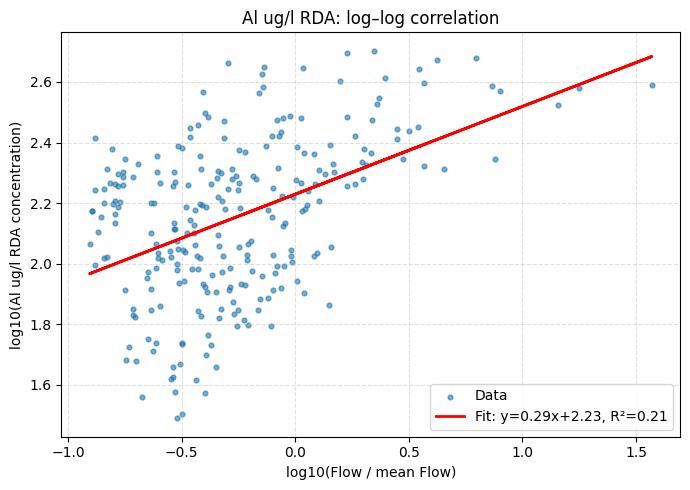

/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


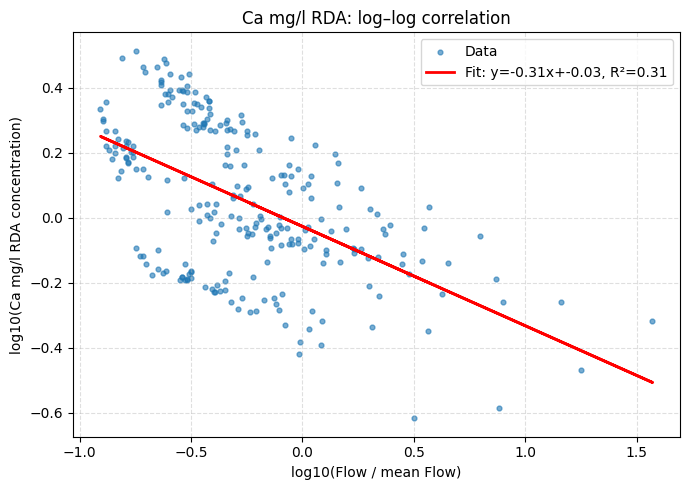

/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


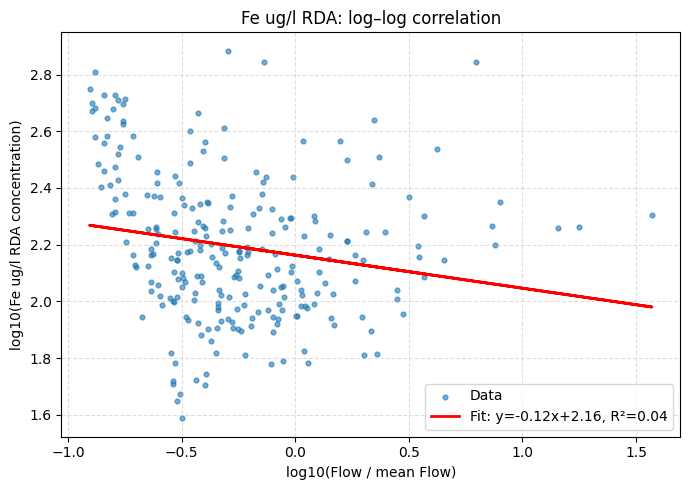

/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


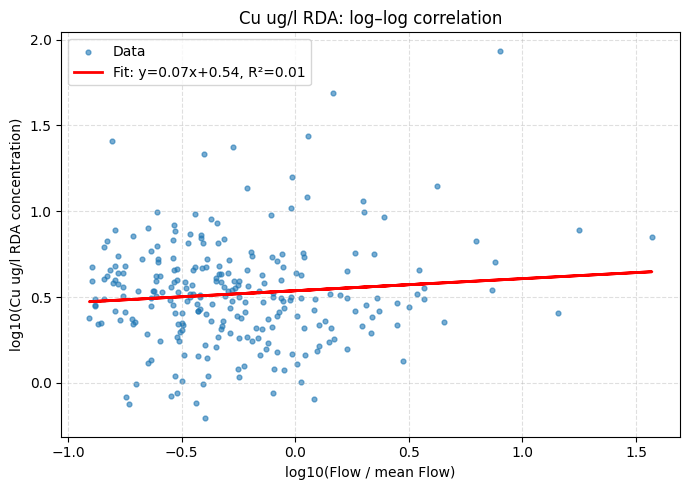

/tmp/ipython-input-2845449519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['logConc'] = np.log10(df_valid[metal])


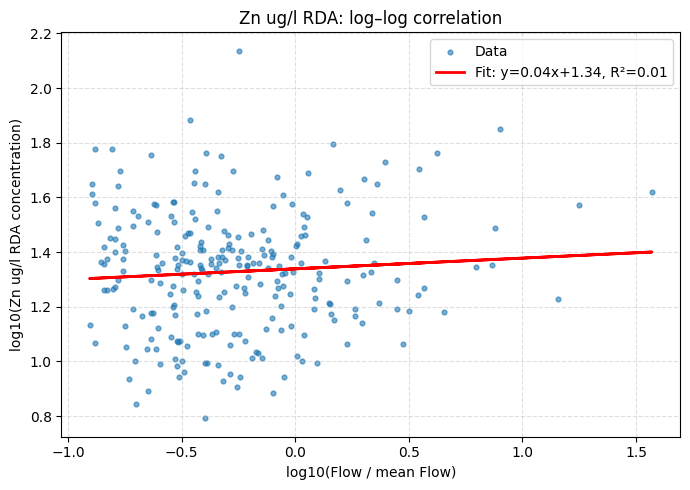

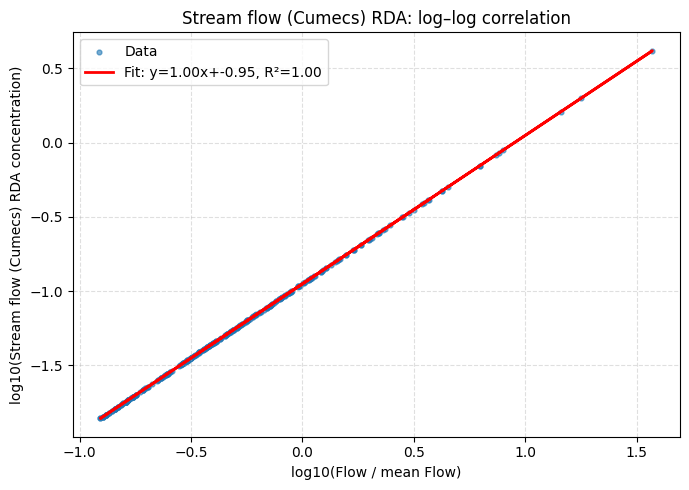

In [21]:
# === Clean ===
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# filter between 1998 and 2003
df_F = df[(df['date_time'].dt.year >= 2005) & (df['date_time'].dt.year <= 2005)]
df_F = df_F.dropna(subset=['date_time', 'Stream flow (Cumecs) RDA'])

# === Compute flow normalization and log-transform ===
df_F['Flow_norm'] = df_F['Stream flow (Cumecs) RDA'] / df_F['Stream flow (Cumecs) RDA'].mean()
df_F['logFlow'] = np.log10(df_F['Flow_norm'])

# === Identify dissolved element columns ===
metals = [col for col in df_F.columns if any(x in col for x in ['Al', 'Cu', 'Na', 'Ca', 'Mg', 'Fe', 'Zn'])]

# === Plot log–log with regression line ===
for metal in metals:
    if df_F[metal].dropna().empty:
        continue
    df_valid = df_F.dropna(subset=[metal])
    df_valid['logConc'] = np.log10(df_valid[metal])

    x = df_valid['logFlow']
    y = df_valid['logConc']

    slope, intercept, r_value, _, _ = linregress(x, y)
    line = slope * x + intercept

    plt.figure(figsize=(7, 5))
    plt.scatter(x, y, alpha=0.6, s=12, label='Data')
    plt.plot(x, line, color='red', linewidth=2, label=f'Fit: y={slope:.2f}x+{intercept:.2f}, R²={r_value**2:.2f}')
    plt.xlabel('log10(Flow / mean Flow)')
    plt.ylabel(f'log10({metal} concentration)')
    plt.title(f'{metal}: log–log correlation')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()